In [10]:
import numpy as np
from bc import *

out = mlp(initial_learning_rate=0.3, final_learning_rate=0.3,
         L1_reg=0.000, L2_reg=0.000, n_epochs=50, batch_size=200,
         n_hidden=1024, n_hiddenLayers=3, verbose=True, 
         stochastic=False, binary=True, which_data='mnist', 
         seedval=420, outputlayer='logistic', early_stopping=False)

Loading MNIST data...
Building the model...
Using Deterministic Binary Connect with Logistic Output Layer
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 250/250, training error 27.030000 %, validation error 26.910000 %, test error 27.910000 %
training @ iter =  300
training @ iter =  400
epoch 2, minibatch 250/250, training error 16.720000 %, validation error 16.780000 %, test error 17.700000 %
training @ iter =  500
training @ iter =  600
training @ iter =  700
epoch 3, minibatch 250/250, training error 13.830000 %, validation error 14.160000 %, test error 15.390000 %
training @ iter =  800
training @ iter =  900
epoch 4, minibatch 250/250, training error 12.460000 %, validation error 12.690000 %, test error 14.120000 %
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
epoch 5, minibatch 250/250, training error 11.190000 %, validation error 11.630000 %, test error 13.160000 %
training @ iter =  1300
training @ i

The training process for function mlp ran for 4.72m


In [11]:
print 'W'
print np.min(out.hiddenLayers[0].W.eval()), np.max(out.hiddenLayers[0].W.eval())
print 'Wb'
print np.min(out.hiddenLayers[0].Wb.eval()), np.max(out.hiddenLayers[0].Wb.eval())

W
-0.999999 1.0
Wb
-1.0 1.0


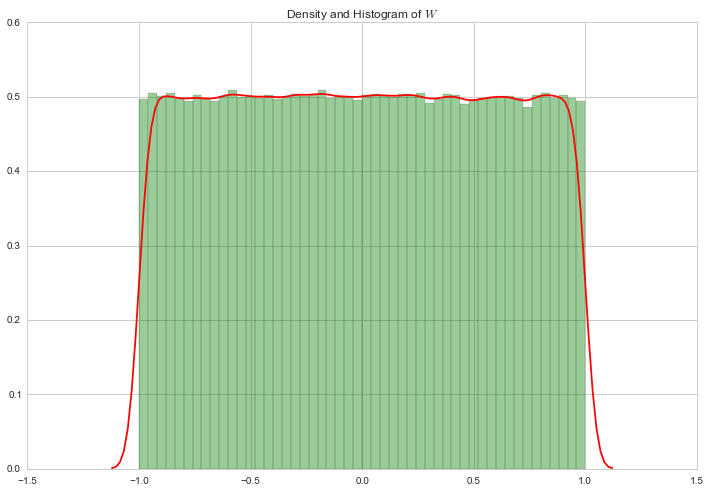

In [12]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

x = out.hiddenLayers[0].W.eval()
x = x.reshape(np.prod(x.shape))

plt.figure(figsize=(12,8))
plt.title('Density and Histogram of $W$')
sns.distplot(x, color='red', hist_kws={'color':'green'})
plt.show()

In [33]:
data = np.genfromtxt('./output/mnist_bin_deterministic_LRout_perf.csv',delimiter=',', skip_header=1)
out ={}
for x,y in zip( ('epoch','train','valid','test'), (0, 6, 7, 8)):
    out[x] = data[:,y]

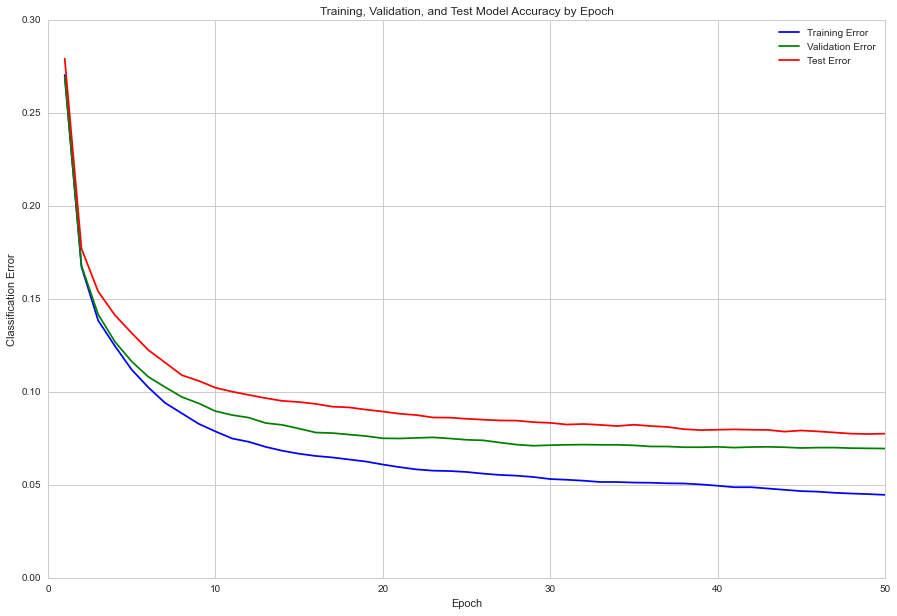

In [44]:
plt.figure(figsize=(15,10))
plt.title("Training, Validation, and Test Model Accuracy by Epoch ")
plt.plot(out['epoch'],out['train'], color='blue', label='Training Error')
plt.plot(out['epoch'],out['valid'], color='green', label='Validation Error')
plt.plot(out['epoch'],out['test'], color='red', label='Test Error')
plt.xlabel("Epoch")
plt.ylabel('Classification Error')
plt.legend(loc='upper right')
plt.show()